# Gaze Estimation Analysis

In [1]:
#We load the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['agg.path.chunksize'] = 0
mpl.rcParams.update( mpl.rc_params() )
plt.rcParams.update({'font.size': 11})
#plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': 'bold'})
plt.rc('font', family='serif')

## We load the data

In [3]:
df = pd.read_csv('../data/dataset_balanced_gaze_v2.csv')
df

,video_key,child_id,ASD,age,gender,VideoDuration,VideoFrameRate,VideoFrameHeight,VideoFrameWidth,Confidence1,...,AgeLow,AgeHigh,Gender,GenderConf,Size,openface_key,openpose_jsons_path,openpose_images_path,eye_gazing_features,overall_confidence
0,_REVIEWED/Testing_ProcessComplete/matt_savage@...,matt_savage@sbcglobal.net__Easton,0,5.0,Male,89.1,30.0,360.0,480.0,99.2,...,6.9,14.4,Male,90.5,0.030015,_REVIEWED/Testing_ProcessComplete/matt_savage@...,_REVIEWED/Testing_ProcessComplete/matt_savage@...,_REVIEWED/Testing_ProcessComplete/matt_savage@...,"[[0.229258, -0.086175, -0.969543, 0.069048, -0...",0.8580
1,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,sourire_4me2@att.net__Gabriella,1,11.0,Female,89.1,24.0,360.0,480.0,99.8,...,20.6,28.8,Female,97.6,0.046882,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,"[[0.24689499999999998, -0.000195, -0.969042, 0...",0.8800
2,_REVIEWED/Testing_ProcessComplete/odaliscorder...,odaliscordero@gmail.com__Sarah,0,2.0,Female,88.6,25.0,360.0,480.0,99.0,...,2.6,9.2,Female,98.5,0.185876,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,"[[-0.28481799999999996, 0.193163, -0.938918, -...",0.9800
3,annaseemayer@yahoo.co.uk/1591439040/GuessWhat.mp4,annaseemayer@yahoo.co.uk__Catherine,0,7.0,Female,94.6,25.0,360.0,480.0,99.1,...,32.2,40.0,Female,99.4,0.284316,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,"[[0.145224, -0.29078899999999996, -0.945702, -...",0.8775
4,tami_mcin@hotmail.com/1587233613/GuessWhat.mp4,tami_mcin@hotmail.com__Adrian,1,7.0,Male,107.5,25.0,360.0,480.0,99.9,...,10.7,18.8,Male,94.0,0.250136,GuessWhat/tami_mcin@hotmail.com/1587233613/Ope...,GuessWhat/tami_mcin@hotmail.com/1587233613/jsons/,GuessWhat/tami_mcin@hotmail.com/1587233613/ima...,"[[-0.153869, -0.13149, -0.979303, -0.159637, -...",0.9800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,_REVIEWED/remote_participants/anamontejo%40yah...,anamontejo@yahoo.com.au__Toben,1,6.0,Male,87.3,23.8,720.0,960.0,99.2,...,9.4,16.5,Female,87.5,0.094710,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,"[[0.163576, 0.104179, -0.981015, 0.02110399999...",0.9200
292,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,psidhu15@gmail.com__eshar,0,3.0,Female,86.9,30.0,768.0,1024.0,99.9,...,3.8,10.3,Female,98.2,0.111147,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,"[[0.105413, 0.473625, -0.874395, -0.144262, 0....",0.8960
293,mrspaine%40yahoo.com/1637525368746/GuessWhat.mp4,mrspaine@yahoo.com__Eden,1,8.0,Female,57.6,29.9,480.0,640.0,100.0,...,11.3,18.6,Female,98.8,0.176444,mrspaine%40yahoo.com/1637525368746/OpenFace.csv,mrspaine%40yahoo.com/1637525368746/jsons/,mrspaine%40yahoo.com/1637525368746/images/,"[[-0.11730299999999999, -0.421849, -0.89904599...",0.9800
294,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,vesna_tz@yahoo.com__Filip,0,2.0,Male,89.2,24.0,360.0,480.0,99.5,...,3.3,8.6,Male,92.7,0.218223,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,"[[-0.132672, 0.21478200000000003, -0.967609, -...",0.9000


# Eye Gazing Features : Length

Not all videos have eye gazing features. They don't have the same number of frames.

In [11]:
#We visualize the length of the eye gazing features (ie. for how many frames did we manage to collect eye gazing features)
df['length'] = df['eye_gazing_features'].apply(eval).apply(len)
#Drop the rows where the length is 0
df = df[df['length'] != 0]
df

,video_key,child_id,ASD,age,gender,VideoDuration,VideoFrameRate,VideoFrameHeight,VideoFrameWidth,Confidence1,...,AgeHigh,Gender,GenderConf,Size,openface_key,openpose_jsons_path,openpose_images_path,eye_gazing_features,overall_confidence,length
0,_REVIEWED/Testing_ProcessComplete/matt_savage@...,matt_savage@sbcglobal.net__Easton,0,5.0,Male,89.1,30.0,360.0,480.0,99.2,...,14.4,Male,90.5,0.030015,_REVIEWED/Testing_ProcessComplete/matt_savage@...,_REVIEWED/Testing_ProcessComplete/matt_savage@...,_REVIEWED/Testing_ProcessComplete/matt_savage@...,"[[0.229258, -0.086175, -0.969543, 0.069048, -0...",0.8580,5
1,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,sourire_4me2@att.net__Gabriella,1,11.0,Female,89.1,24.0,360.0,480.0,99.8,...,28.8,Female,97.6,0.046882,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,"[[0.24689499999999998, -0.000195, -0.969042, 0...",0.8800,3
2,_REVIEWED/Testing_ProcessComplete/odaliscorder...,odaliscordero@gmail.com__Sarah,0,2.0,Female,88.6,25.0,360.0,480.0,99.0,...,9.2,Female,98.5,0.185876,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,"[[-0.28481799999999996, 0.193163, -0.938918, -...",0.9800,2
3,annaseemayer@yahoo.co.uk/1591439040/GuessWhat.mp4,annaseemayer@yahoo.co.uk__Catherine,0,7.0,Female,94.6,25.0,360.0,480.0,99.1,...,40.0,Female,99.4,0.284316,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,"[[0.145224, -0.29078899999999996, -0.945702, -...",0.8775,4
4,tami_mcin@hotmail.com/1587233613/GuessWhat.mp4,tami_mcin@hotmail.com__Adrian,1,7.0,Male,107.5,25.0,360.0,480.0,99.9,...,18.8,Male,94.0,0.250136,GuessWhat/tami_mcin@hotmail.com/1587233613/Ope...,GuessWhat/tami_mcin@hotmail.com/1587233613/jsons/,GuessWhat/tami_mcin@hotmail.com/1587233613/ima...,"[[-0.153869, -0.13149, -0.979303, -0.159637, -...",0.9800,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,_REVIEWED/remote_participants/anamontejo%40yah...,anamontejo@yahoo.com.au__Toben,1,6.0,Male,87.3,23.8,720.0,960.0,99.2,...,16.5,Female,87.5,0.094710,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,"[[0.163576, 0.104179, -0.981015, 0.02110399999...",0.9200,5
292,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,psidhu15@gmail.com__eshar,0,3.0,Female,86.9,30.0,768.0,1024.0,99.9,...,10.3,Female,98.2,0.111147,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,"[[0.105413, 0.473625, -0.874395, -0.144262, 0....",0.8960,5
293,mrspaine%40yahoo.com/1637525368746/GuessWhat.mp4,mrspaine@yahoo.com__Eden,1,8.0,Female,57.6,29.9,480.0,640.0,100.0,...,18.6,Female,98.8,0.176444,mrspaine%40yahoo.com/1637525368746/OpenFace.csv,mrspaine%40yahoo.com/1637525368746/jsons/,mrspaine%40yahoo.com/1637525368746/images/,"[[-0.11730299999999999, -0.421849, -0.89904599...",0.9800,1
294,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,vesna_tz@yahoo.com__Filip,0,2.0,Male,89.2,24.0,360.0,480.0,99.5,...,8.6,Male,92.7,0.218223,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,"[[-0.132672, 0.21478200000000003, -0.967609, -...",0.9000,2


In [12]:
df['length'].describe()

count    285.000000
mean       3.677193
std        2.281510
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       14.000000
Name: length, dtype: float64

In [13]:
#We drop the ones where we don't have any eye gazing features
df = df[df['length'] > 0]

In [14]:
df

,video_key,child_id,ASD,age,gender,VideoDuration,VideoFrameRate,VideoFrameHeight,VideoFrameWidth,Confidence1,...,AgeHigh,Gender,GenderConf,Size,openface_key,openpose_jsons_path,openpose_images_path,eye_gazing_features,overall_confidence,length
0,_REVIEWED/Testing_ProcessComplete/matt_savage@...,matt_savage@sbcglobal.net__Easton,0,5.0,Male,89.1,30.0,360.0,480.0,99.2,...,14.4,Male,90.5,0.030015,_REVIEWED/Testing_ProcessComplete/matt_savage@...,_REVIEWED/Testing_ProcessComplete/matt_savage@...,_REVIEWED/Testing_ProcessComplete/matt_savage@...,"[[0.229258, -0.086175, -0.969543, 0.069048, -0...",0.8580,5
1,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,sourire_4me2@att.net__Gabriella,1,11.0,Female,89.1,24.0,360.0,480.0,99.8,...,28.8,Female,97.6,0.046882,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,"[[0.24689499999999998, -0.000195, -0.969042, 0...",0.8800,3
2,_REVIEWED/Testing_ProcessComplete/odaliscorder...,odaliscordero@gmail.com__Sarah,0,2.0,Female,88.6,25.0,360.0,480.0,99.0,...,9.2,Female,98.5,0.185876,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,"[[-0.28481799999999996, 0.193163, -0.938918, -...",0.9800,2
3,annaseemayer@yahoo.co.uk/1591439040/GuessWhat.mp4,annaseemayer@yahoo.co.uk__Catherine,0,7.0,Female,94.6,25.0,360.0,480.0,99.1,...,40.0,Female,99.4,0.284316,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,"[[0.145224, -0.29078899999999996, -0.945702, -...",0.8775,4
4,tami_mcin@hotmail.com/1587233613/GuessWhat.mp4,tami_mcin@hotmail.com__Adrian,1,7.0,Male,107.5,25.0,360.0,480.0,99.9,...,18.8,Male,94.0,0.250136,GuessWhat/tami_mcin@hotmail.com/1587233613/Ope...,GuessWhat/tami_mcin@hotmail.com/1587233613/jsons/,GuessWhat/tami_mcin@hotmail.com/1587233613/ima...,"[[-0.153869, -0.13149, -0.979303, -0.159637, -...",0.9800,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,_REVIEWED/remote_participants/anamontejo%40yah...,anamontejo@yahoo.com.au__Toben,1,6.0,Male,87.3,23.8,720.0,960.0,99.2,...,16.5,Female,87.5,0.094710,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,"[[0.163576, 0.104179, -0.981015, 0.02110399999...",0.9200,5
292,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,psidhu15@gmail.com__eshar,0,3.0,Female,86.9,30.0,768.0,1024.0,99.9,...,10.3,Female,98.2,0.111147,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,"[[0.105413, 0.473625, -0.874395, -0.144262, 0....",0.8960,5
293,mrspaine%40yahoo.com/1637525368746/GuessWhat.mp4,mrspaine@yahoo.com__Eden,1,8.0,Female,57.6,29.9,480.0,640.0,100.0,...,18.6,Female,98.8,0.176444,mrspaine%40yahoo.com/1637525368746/OpenFace.csv,mrspaine%40yahoo.com/1637525368746/jsons/,mrspaine%40yahoo.com/1637525368746/images/,"[[-0.11730299999999999, -0.421849, -0.89904599...",0.9800,1
294,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,vesna_tz@yahoo.com__Filip,0,2.0,Male,89.2,24.0,360.0,480.0,99.5,...,8.6,Male,92.7,0.218223,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,"[[-0.132672, 0.21478200000000003, -0.967609, -...",0.9000,2


In [15]:
df['length'].describe()

count    285.000000
mean       3.677193
std        2.281510
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       14.000000
Name: length, dtype: float64

Text(0.5, 0, '')

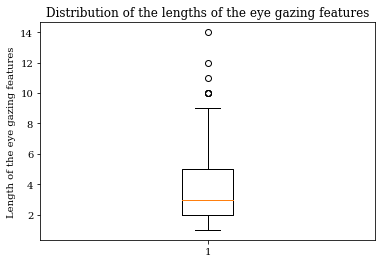

In [16]:
#We visualize the distribution of the lengths of the eye gazing features using a boxplot
plt.boxplot(df['length'])
#Title
plt.title('Distribution of the lengths of the eye gazing features')
#y-axis label
plt.ylabel('Length of the eye gazing features')
#delete the x-axis label
plt.xlabel('')

## We Visualize the Confidence

Text(0, 0.5, 'Confidence')

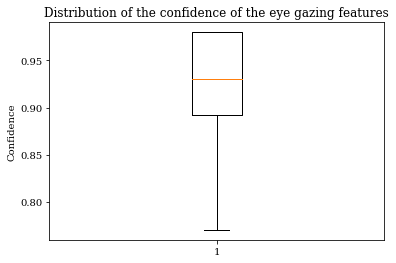

In [18]:
#We visualize the distribution of the confidence of the eye gazing features using a boxplot
plt.boxplot(df['overall_confidence'])
#Title
plt.title('Distribution of the confidence of the eye gazing features')
#Y-axis label
plt.ylabel('Confidence')

## We Save Our Final Dataset

In [19]:
#We save the dataframe
df.to_csv('../data/dataset_balanced_gaze_final_v2.csv', index=False)